[View in Colaboratory](https://colab.research.google.com/github/b0nedev/data_science_tutorial/blob/master/Classification.ipynb)

In [0]:
import sklearn
from matplotlib import pyplot as plt

*   iris(붓꽃) 데이터 셋 preprocessing
*   df 변수가 iris(data, species) 데이터셋을 로드한 dataframe 객체를 참조하고 있음

In [0]:
import sklearn.datasets
import pandas as pd

def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

df = get_iris_df()

# 분류기
*   분류는 라벨(y value)이 있는 데이터셋에서 사용 됨
*   정의되어 있는 분류 중 하나로 분류가 되고 y_value와 예측값을 가지고 평가
*  하단의 코드는 Logistic 회귀, 나이브 베이지안, 결정 트리, 랜덤 포레스트 성능 비교


Text(0,0.5,'True postive percent')

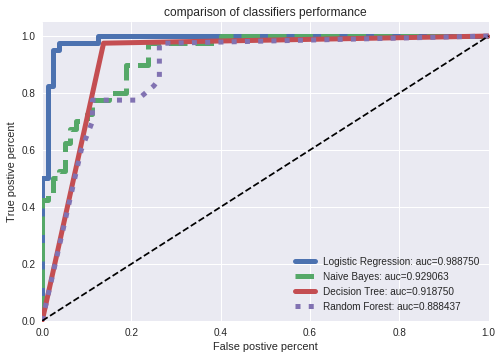

In [4]:
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

CLASS_MAP = {
    'Logistic Regression':
        ('-', LogisticRegression()),
    'Naive Bayes':
        ('--', GaussianNB()),
    'Decision Tree':
        ('.-', DecisionTreeClassifier(max_depth=5)),
    'Random Forest':
        (':', RandomForestClassifier(
            max_depth=5, n_estimators=10,
            max_features=1)),
}

X, Y = df[df.columns[:3]], (df['species'] == 'virginica')
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.8)

for name, (line_fmt, model) in CLASS_MAP.items():
    model.fit(X_train, Y_train)
    preds = model.predict_proba(X_test)
    pred = pd.Series(preds[:,1])
    fpr, tpr, threasholds = roc_curve(Y_test, pred)
    auc_score = auc(fpr, tpr)
    label='%s: auc=%f' % (name, auc_score)
    plt.plot(fpr, tpr, line_fmt, linewidth=5, label=label)
    
plt.legend(loc='lower right')
plt.title('comparison of classifiers performance')

plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False postive percent')
plt.ylabel('True postive percent')
